# Mosmed data analysis

Krzysztof Wolny 

Analysis of data obtained by Department of Health Care of Moscow: "MosMedData: Chest CT Scans With COVID-19 Related Findings Dataset". 

Link to the article: https://arxiv.org/abs/2005.06465

WATCH OUT: Data has 11 GB, so you need time and storage to download it!!! 

Link to download data: https://mosmed.ai/datasets/covid19_1110



## Data dowload 
### Data files
* `README_EN.md` and `README_RU.md` contain general information about the dataset; they have been saved in `Markdown` format in English and Russian languages, respectively. `README_EN.pdf` and `README_RU.pdf` contain the same information but have been saved in `PDF` format for the ease of convenience.
* `LICENSE` file contains full description of Creative Commons Attribution-NonCommercial-NoDerivs 3.0 Unported (CC BY-NC-ND 3.0) License
* `dataset_registry.xlsx` is a spreadsheet with full list of studies included in the dataset as well as relative paths to a study file and to a binary mask, if present.
* `studies` directory contains directories named as `CT-0`, `CT-1`, `CT-2`, `CT-3`, and `CT-4` (for more information see below). Each directory contains studies in `NIfTI` format, that have been saved in `Gzip` archive. Each study has a unique name like `study_BBBB.nii.gz`, where `BBBB` is a sequential number of the study in the whole dataset. 
* `masks` directory contains binary pixel masks in `NIfTI` format, that have been saved in `Gzip` archive. Each study has a unique name like `study_BBBB_mask.nii.gz`, where `BBBB` is a number of the corresponding study.
### Class C Annotation Principles

Studies are distributed into 5 categories: 
* **CT-0** (`/studies/CT-0` directory): normal lung tissue, no CT-signs of viral pneumonia.
* **CT-1** (`/studies/CT-1` directory): several ground-glass opacifications, involvement of lung parenchyma is less than 25%.
* **CT-2** (`/studies/CT-2` directory): ground-glass opacifications, involvement of lung parenchyma is between 25 and 50%. 
* **CT-3** (`/studies/CT-3` directory): ground-glass opacifications and regions of consolidation, involvement of lung parenchyma is between 50 and 75%.
* **CT-4** (`/studies/CT-4` directory): diffuse ground-glass opacifications and consolidation as well as reticular changes in lungs. Involvement of lung parenchyma exceeds 75%.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
import nibabel as nib

DATA_PATH = "./COVID19_1110/"
MASKS_PATH = "masks/"
STUDIES_PATH = "studies/"

In [3]:
# read all masks nifti data
masks_dir_list = os.listdir(DATA_PATH+MASKS_PATH)
n_masks = len(masks_dir_list)
masks = [None] * n_masks

for i in range(n_masks):
    masks[i] = nib.load(DATA_PATH+MASKS_PATH+masks_dir_list[i])

In [4]:
# read all studies nifti data
studies_dirs_list = os.listdir(DATA_PATH+STUDIES_PATH)
studies = {}

for st_dir in studies_dirs_list: 
    if (st_dir=='.DS_Store'):
        continue
    dirs_list = os.listdir(DATA_PATH+STUDIES_PATH+st_dir)
    n = len(dirs_list)
    stud = [None] * n
    for i in range(n):
        stud[i] = nib.load(DATA_PATH+STUDIES_PATH+st_dir+"/"+dirs_list[i])
    studies[st_dir]=stud

## Masks

In [5]:
print(masks[0].header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  38   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.     0.923  0.923  8.     0.     0.     0.     0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Time=234114.350'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 222.194
qoffset_y       : -235.78648
qoffset_z       : -

In [6]:
#The last value of header.get_zooms() is the time between scans in milliseconds; this is the equivalent of voxel size on the time axis.

masks[0].header.get_zooms()

(0.923, 0.923, 8.0)

In [7]:
# Obraz 
masks[0].get_fdata()

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [8]:
print("Shape of scans: ",masks[0].get_fdata().shape)
print("Total amount of values: ", np.prod( masks[0].get_fdata().shape))
print("Unique values: ", np.unique(masks[0].get_fdata()))

Shape of scans:  (512, 512, 38)
Total amount of values:  9961472
Unique values:  [0. 1.]


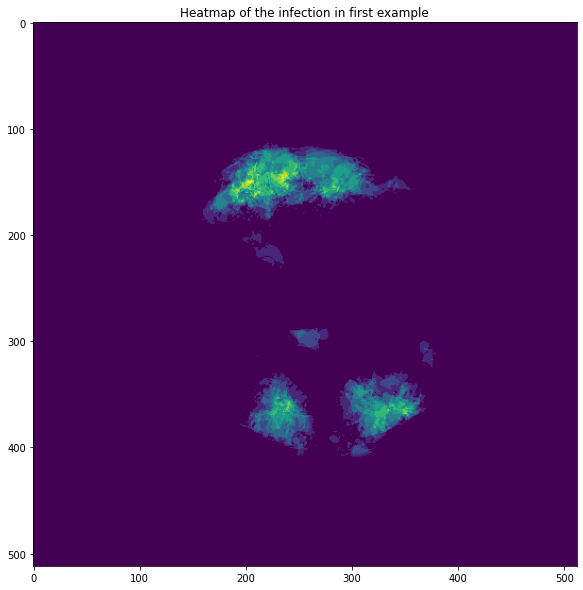

In [4]:
#plt.imshow(masks[0].get_fdata()[:,:,20])
m = masks[0].get_fdata()[:,:,1]
for i in range(1,35):
    m += masks[0].get_fdata()[:,:,1+i]
#plt.imshow(masks[0].get_fdata()[:,:,1+i])
plt.imshow(m)
plt.title("Heatmap of the infection in first example")
plt.gcf().set_size_inches(10, 10)
plt.show()

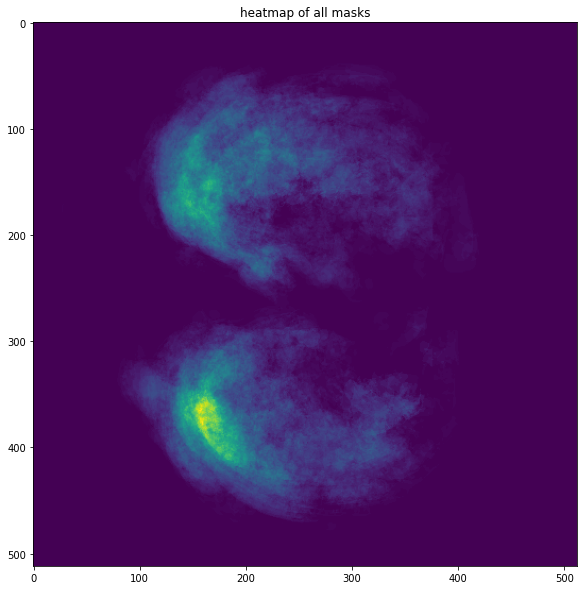

In [5]:
m = [[0]*512]*512
for mask in masks:
    for i in range(mask.get_fdata().shape[2]):
        m += mask.get_fdata()[:,:,i]
plt.imshow(m)
plt.title("heatmap of all masks")
plt.gcf().set_size_inches(10, 10)
plt.show()

In [11]:
len(studies["CT-0"])

254

## Studies

In [12]:
print("Shape of scans: ",studies["CT-0"][0].get_fdata().shape)
print("Total amount of values: ", np.prod( studies["CT-0"][0].get_fdata().shape))

Shape of scans:  (512, 512, 43)
Total amount of values:  11272192


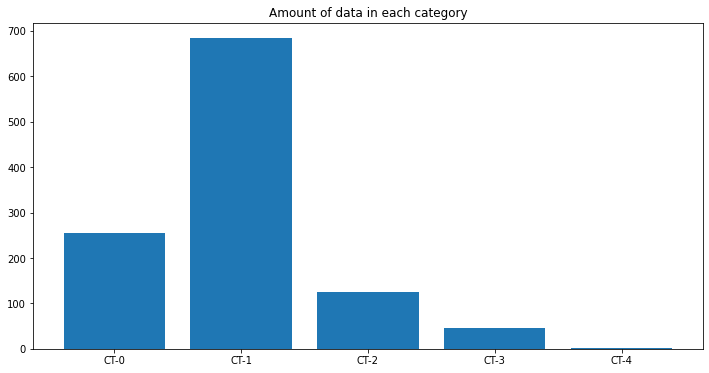

In [16]:
ct_len = []
names = ["CT-0", "CT-1", "CT-2", "CT-3", "CT-4"]

for ct in studies: 
    ct_len.append(len(studies[ct]))

plt.figure(figsize=(12,6))
plt.bar(names, ct_len)
plt.title("Amount of data in each category")
plt.show()

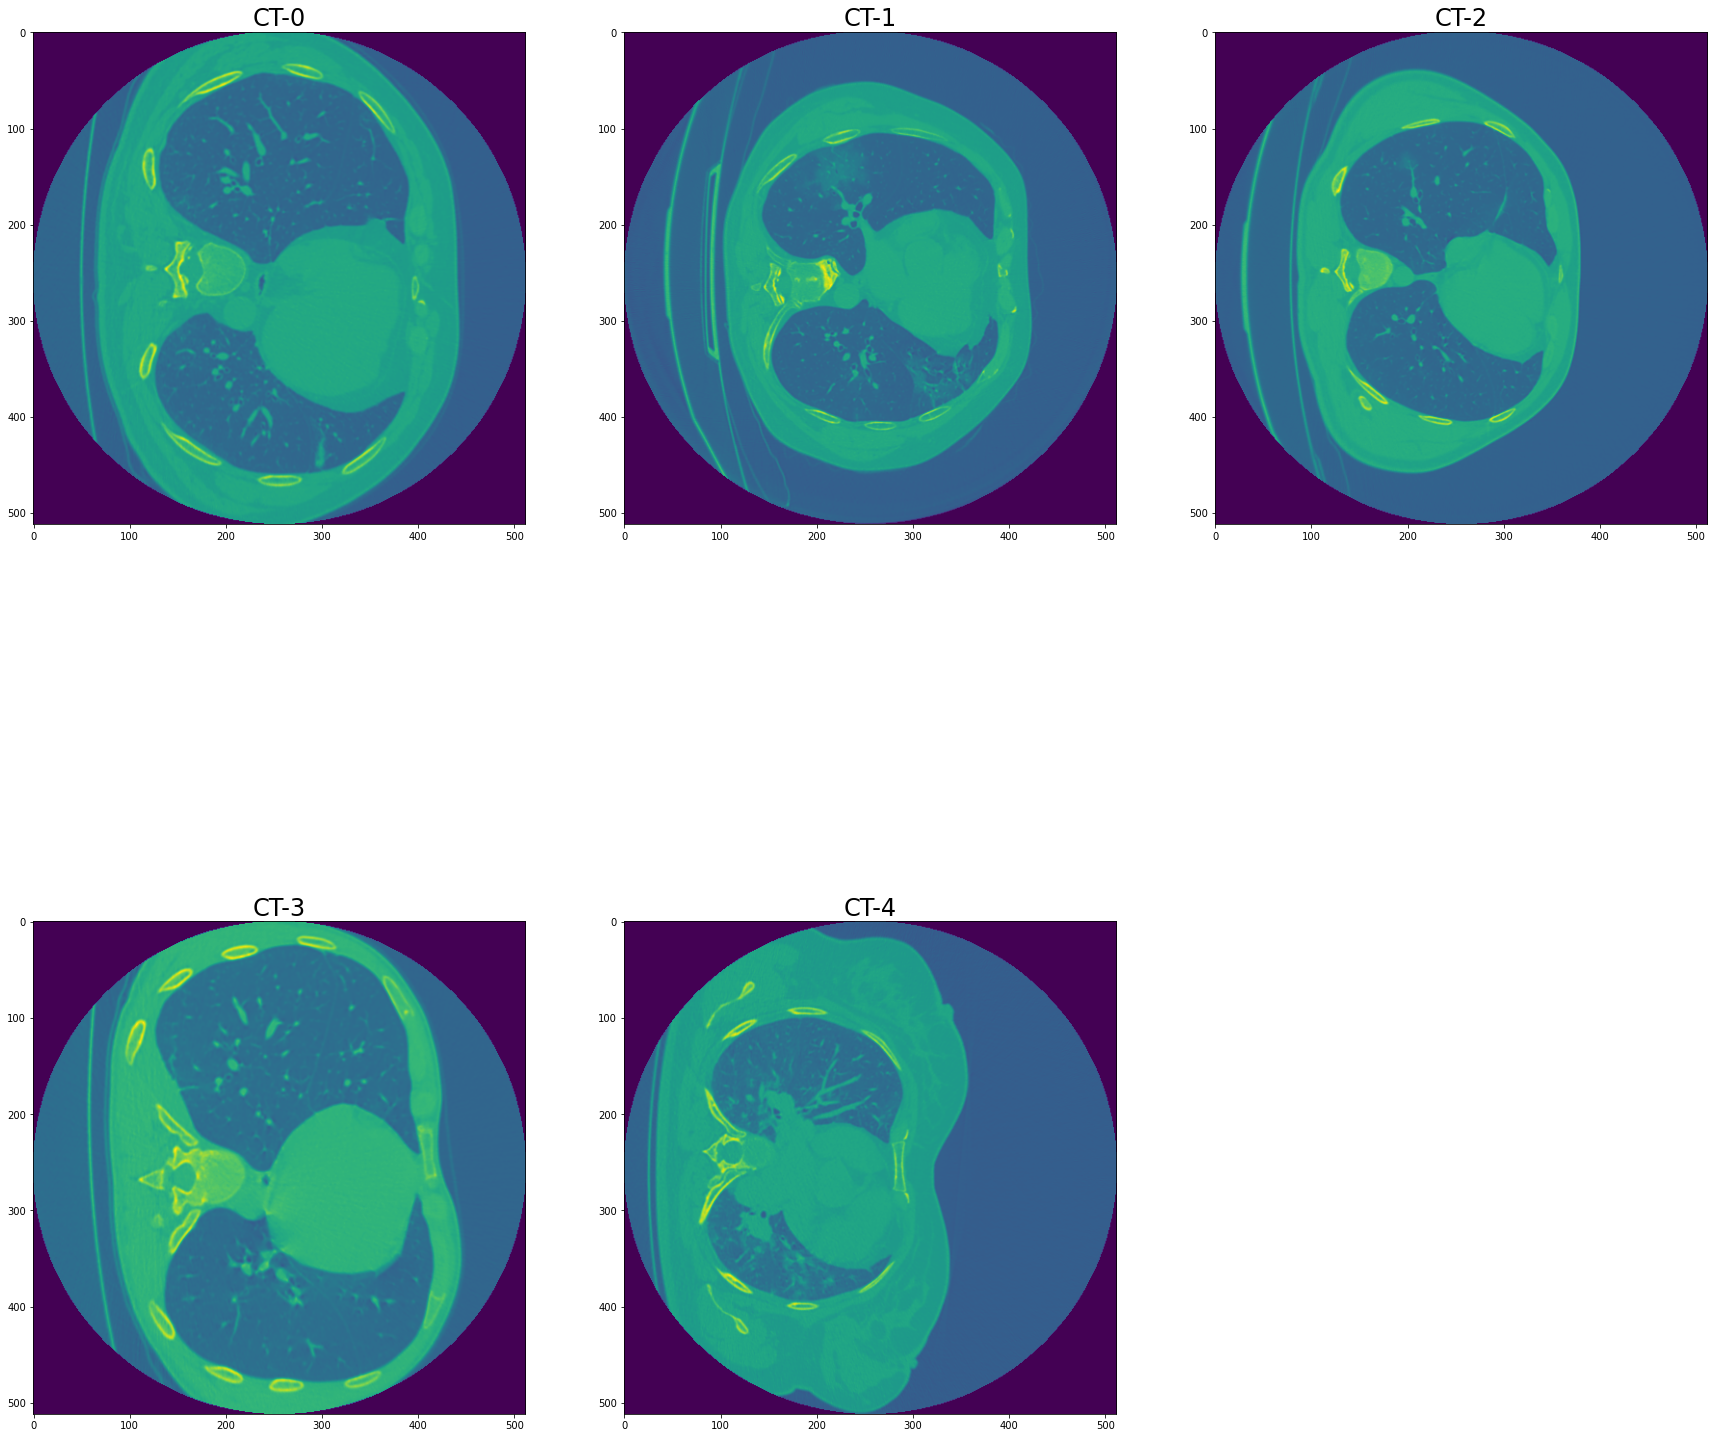

In [17]:
plt.figure(figsize=(1, 1)) 
ax = plt.subplot(2,3,1)
plt.imshow(studies["CT-"+str(0)][0].get_fdata()[:,:,15])
plt.gcf().set_size_inches(30, 30)
ax.set_title("CT-"+str(0), fontsize=24)

ax = plt.subplot(2,3,2)
plt.imshow(studies["CT-"+str(1)][0].get_fdata()[:,:,15])
plt.gcf().set_size_inches(30, 30)
ax.set_title("CT-"+str(1), fontsize=24)


ax = plt.subplot(2,3,3)
plt.imshow(studies["CT-"+str(2)][0].get_fdata()[:,:,26])
plt.gcf().set_size_inches(30, 30)
ax.set_title("CT-"+str(2), fontsize=24)

ax = plt.subplot(2,3,4)
plt.imshow(studies["CT-"+str(3)][0].get_fdata()[:,:,15 ])
plt.gcf().set_size_inches(30, 30)
ax.set_title("CT-"+str(3), fontsize=24)

ax = plt.subplot(2,3,5)
plt.imshow(studies["CT-"+str(4)][0].get_fdata()[:,:,20])
plt.gcf().set_size_inches(30, 30)
ax.set_title("CT-"+str(4), fontsize=24)

plt.show()